<a href="https://colab.research.google.com/github/rufflester/tryforeyrc/blob/main/5_5task2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error:  [Errno 2] No such file or directory: './input'


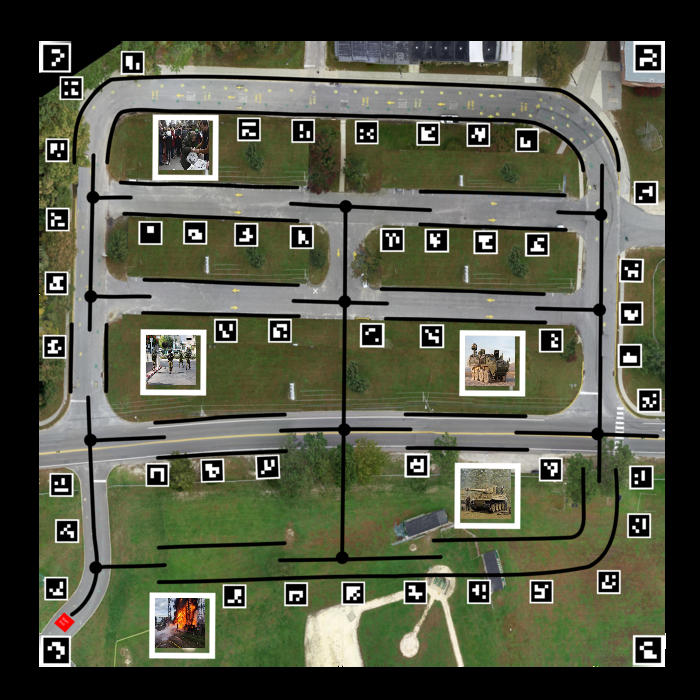

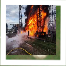

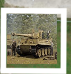

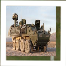

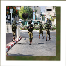

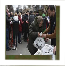

(1, 224, 224, 3)
1/1 [==============================] - 4s 4s/step
1 fire
(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
2 militaryvehicles
(1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
3 militaryvehicles
(1, 224, 224, 3)
1/1 [==============================] - 2s 2s/step
4 combat
(1, 224, 224, 3)


1/1 [==============================] - 1s 1s/step
5 humanitarianaid
Error:  [Errno 2] No such file or directory: './output'


In [ ]:
'''
*******************************
*
*        		===============================================
*           		GeoGuide(GG) Theme (eYRC 2023-24)
*        		===============================================
*
*  This script is to implement Task 2C of GeoGuide(GG) Theme (eYRC 2023-24).
*
*  This software is made available on an "AS IS WHERE IS BASIS".
*  Licensee/end user indemnifies and will keep e-Yantra indemnified from
*  any and all claim(s) that emanate from the use of the Software or
*  breach of the terms of this agreement.
*
*******************************
'''
############################## FILL THE MANDATORY INFORMATION BELOW ###############################

# Team ID:			[ Team-ID ]
# Author List:		[ Names of team members worked on this file separated by Comma: Name1, Name2, ... ]
# Filename:			task_2c.py
# Functions:	    [`classify_event(image)` ]
###################################################################################################

# IMPORTS (DO NOT CHANGE/REMOVE THESE IMPORTS)
from sys import platform
import numpy as np
import subprocess
import cv2 as cv       # OpenCV Library
import shutil
import ast
import sys
import os
import cv2
from google.colab.patches import cv2_imshow
# Additional Imports
'''
You can import your required libraries here
'''
from tensorflow.keras.models import load_model
from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# DECLARING VARIABLES (DO NOT CHANGE/REMOVE THESE VARIABLES)
arena_path = "arena.png"            # Path of generated arena image
event_list = []
detected_list = []

# Declaring Variables
'''
You can delare the necessary variables here
'''

# EVENT NAMES
'''
We have already specified the event names that you should train your model with.
DO NOT CHANGE THE BELOW EVENT NAMES IN ANY CASE
If you have accidently created a different name for the event, you can create another
function to use the below shared event names wherever your event names are used.
(Remember, the 'classify_event()' should always return the predefined event names)
'''
combat = "combat"
rehab = "humanitarianaid"
military_vehicles = "militaryvehicles"
fire = "fire"
destroyed_building = "destroyedbuilding"

# Extracting Events from Arena
def arena_image(arena_path):            # NOTE: This function has already been done for you, don't make any changes in it.
    '''
	Purpose:
	---
	This function will take the path of the generated image as input and
    read the image specified by the path.

	Input Arguments:
	---
	`arena_path`: Generated image path i.e. arena_path (declared above)

	Returns:
	---
	`arena` : [ Numpy Array ]

	Example call:
	---
	arena = arena_image(arena_path)
	'''
    '''
    ADD YOUR CODE HERE
    '''
    frame = cv.imread(arena_path)
    arena = cv.resize(frame, (700, 700))
    return arena

def event_identification(arena):        # NOTE: You can tweak this function in case you need to give more inputs
    '''
	Purpose:
	---
	This function will select the events on arena image and extract them as
    separate images.

	Input Arguments:
	---
	`arena`: Image of arena detected by arena_image()

	Returns:
	---
	`event_list`,  : [ List ]
                            event_list will store the extracted event images

	Example call:
	---
	event_list = event_identification(arena)
	'''
    '''
    ADD YOUR CODE HERE
    '''


    # Function to check if an image is predominantly black or white
    def is_black_or_white(image, threshold=0.99):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        black_percentage = np.mean(gray < 5)
        white_percentage = np.mean(gray > 250)
        return black_percentage > threshold or white_percentage > threshold

    # Function to check if an image contains ArUco markers
    def contains_aruco_markers(image, aruco_dict):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        corners, _, _ = cv2.aruco.detectMarkers(gray, aruco_dict)
        return corners is not None and len(corners) > 0

    # Read the image
    image = arena

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold
    _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # List to store segmented images without ArUco markers
    segmented_images_without_aruco = []

    # Iterate through contours and filter only squares
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if the polygon has 4 corners and is a square
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h

            # Adjust this threshold based on your requirement
            if 0.95 <= aspect_ratio <= 1.05:
                # Extract the region of interest (ROI)
                roi = image[y:y + h, x:x + w]

                # Check if the image is predominantly black or white and does not contain ArUco markers
                if not is_black_or_white(roi) and not contains_aruco_markers(roi, cv2.aruco.getPredefinedDictionary(
                        cv2.aruco.DICT_4X4_50)):
                    # Add the ROI to the list
                    segmented_images_without_aruco.append(roi)

    # Sort the segmented images by area in descending order
    segmented_images_without_aruco.sort(key=lambda x: cv2.contourArea(
        cv2.findContours(cv2.cvtColor(x, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]),
                                        reverse=True)

    # Take the top 5 segmented images based on area
    top_5_images = segmented_images_without_aruco[:5]
    ev = []
    kq = top_5_images
    ev.append(kq[1])
    ev.append(kq[0])
    ev.append(kq[2])
    ev.append(kq[3])
    ev.append(kq[4])

    # Display the original image
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Access and display the top 5 segmented images based on area
    for i, segmented_image in enumerate(ev):
        cv2_imshow(segmented_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #print(segmented_image)
    event_list = ev

    return event_list

# Event Detection
def classify_event(image_path):
    '''
	Purpose:
	---
	This function will load your trained model and classify the event from an image which is
    sent as an input.

	Input Arguments:
	---
	`image`: Image path sent by input file

	Returns:
	---
	`event` : [ String ]
						  Detected event is returned in the form of a string

	Example call:
	---
	event = classify_event(image_path)
	'''
    '''
    ADD YOUR CODE HERE
    '''
    '''model = load_model("/content/drive/MyDrive/model2.h5")   # Replace with the actual path to your model


    # Load and preprocess the input image
    image = np.array(image_path)
    image = cv.resize(image, (224, 224))  # Resize the image to match the model's input size
    image = image / 255.0  # Normalize the pixel values to be in the range [0, 1]
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Make predictions using the model
    predictions = model.predict(image)

    # Convert the model's output into an event label
    event_labels = ["combat", "humanitarianaid", "militaryvehicles", "fire", "destroyedbuilding"]
    predicted_event_index = np.argmax(predictions)
    event = event_labels[predicted_event_index]'''

    from cv2 import dnn_superres

    # Create an SR object
    sr = dnn_superres.DnnSuperResImpl_create()

    # Read image
    image = image_path
    image = np.array(image)

    # Read the desired model
    path = "/content/drive/MyDrive/EDSR_x3.pb"
    sr.readModel(path)

    # Set the desired model and scale to get correct pre- and post-processing
    sr.setModel("edsr", 3)

    # Upscale the image
    result = sr.upsample(image)





    model = keras.models.load_model('/content/drive/MyDrive/model2.h5')
    # img_path = image
    # img = image.load_img(img_path, target_size=(height, width))  # height and width should match your model's input shape
    #img = image_path
    img = result
    #img_array = cv2.imread(img)
    img_array = np.array(img)
    resized_image = cv2.resize(img_array, (224, 224))
    img_array = np.expand_dims(resized_image, axis=0)

    print(img_array.shape)
    img_array = img_array / 255.0  # Normalize the pixel values
    #print(img_array)

    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)
    a = [combat, destroyed_building, fire, rehab, military_vehicles]
    b = a[predicted_label]
    event = b

    return event

# ADDITIONAL FUNCTIONS
'''
Although not required but if there are any additonal functions that you're using, you shall add them here.
'''
###################################################################################################
########################### DO NOT MAKE ANY CHANGES IN THE SCRIPT BELOW ###########################
def classification(event_list):
    for img_index in range(0,5):
        img = event_list[img_index]
        detected_event = classify_event(img)
        print((img_index + 1), detected_event)
        if detected_event == combat:
            detected_list.append("combat")
        if detected_event == rehab:
            detected_list.append("rehab")
        if detected_event == military_vehicles:
            detected_list.append("militaryvehicles")
        if detected_event == fire:
            detected_list.append("fire")
        if detected_event == destroyed_building:
            detected_list.append("destroyedbuilding")
    os.remove('arena.png')
    return detected_list

def detected_list_processing(detected_list):
    try:
        detected_events = open("detected_events.txt", "w")
        detected_events.writelines(str(detected_list))
    except Exception as e:
        print("Error: ", e)

def input_function():
    if platform == "win32":
        try:
            subprocess.run("input.exe")
        except Exception as e:
            print("Error: ", e)
    if platform == "linux":
        try:
            subprocess.run("./input")
        except Exception as e:
            print("Error: ", e)

def output_function():
    if platform == "win32":
        try:
            subprocess.run("output.exe")
        except Exception as e:
            print("Error: ", e)
    if platform == "linux":
        try:
            subprocess.run("./output")
        except Exception as e:
            print("Error: ", e)

###################################################################################################
def main():
    ##### Input #####
    input_function()
    #################

    ##### Process #####
    arena = arena_image(arena_path)
    event_list = event_identification(arena)
    detected_list = classification(event_list)
    detected_list_processing(detected_list)
    ###################

    ##### Output #####
    output_function()
    ##################

if __name__ == '__main__':
    try:
        main()
    except KeyboardInterrupt:
        print('Interrupted')
        if os.path.exists('arena.png'):
            os.remove('arena.png')
        if os.path.exists('detected_events.txt'):
            os.remove('detected_events.txt')
        sys.exit()